<a href="https://colab.research.google.com/github/sbhoyar21/SwapnilBhoyar/blob/main/Superstore_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
x=files.upload()

Saving Sample - Superstore.xls to Sample - Superstore.xls


In [ ]:
#load dataset
df_order=pd.read_excel('/content/Sample - Superstore.xls',sheet_name='Orders')

In [ ]:
df_order.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
#data cleaning

In [ ]:
df_order.drop(['Row ID','Order ID','Ship Mode','Postal Code'],axis=1,inplace=True)

In [ ]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Date     9994 non-null   datetime64[ns]
 1   Ship Date      9994 non-null   datetime64[ns]
 2   Customer ID    9994 non-null   object        
 3   Customer Name  9994 non-null   object        
 4   Segment        9994 non-null   object        
 5   Country        9994 non-null   object        
 6   City           9994 non-null   object        
 7   State          9994 non-null   object        
 8   Region         9994 non-null   object        
 9   Product ID     9994 non-null   object        
 10  Category       9994 non-null   object        
 11  Sub-Category   9994 non-null   object        
 12  Product Name   9994 non-null   object        
 13  Sales          9994 non-null   float64       
 14  Quantity       9994 non-null   int64         
 15  Discount       9994 n

In [ ]:
if df_order.duplicated().sum():
  print('duplicates exists')
else:
  print('no duplicates')

duplicates exists


In [ ]:
df_order['Order Date']=pd.to_datetime(df_order['Order Date'])

In [ ]:
print(df_order.dtypes)
print(df_order)

Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object
     Order Date  Ship Date Customer ID     Customer Name    Segment  \
0    2017-11-08 2017-11-11    CG-12520       Claire Gute   Consumer   
1    2017-11-08 2017-11-11    CG-12520       Claire Gute   Consumer   
2    2017-06-12 2017-06-16    DV-13045   Darrin Van Huff  Corporate   
3    2016-10-11 2016-10-18    SO-20335    Sean O'Donnell   Consumer   
4    2016-10-11 2016-10-18    SO-20335    Sean O'Donnell   Consumer   
...         ... 

In [ ]:
df_order.head()

,Order Date,Ship Date,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2017-11-08,2017-11-11,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2017-11-08,2017-11-11,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,2017-06-12,2017-06-16,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,2016-10-11,2016-10-18,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,2016-10-11,2016-10-18,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
#Calculation of Total Sales

In [ ]:
total_sales=df_order['Sales'].sum()
total_sales

2297200.8603000003

In [ ]:
#Calculation average order value
average_order=df_order['Sales'].mean()

In [ ]:
average_order

229.85800083049833

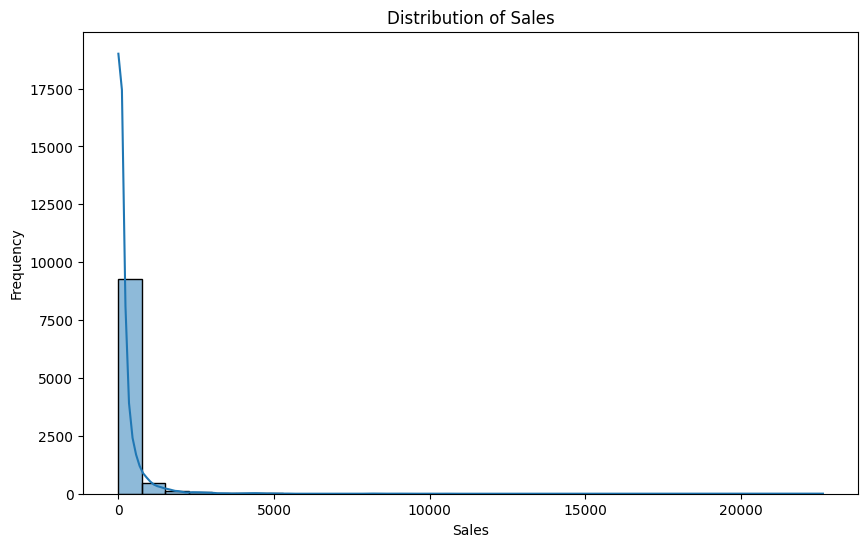

In [ ]:
#visualization of Distribution of sales
plt.figure(figsize=(10, 6))
sns.histplot(df_order['Sales'], bins=30, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

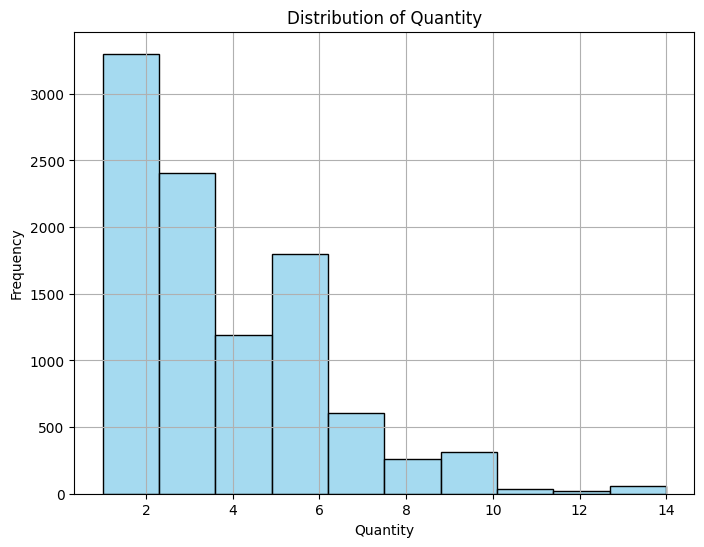

In [ ]:
# Visualisation of order quantity
plt.figure(figsize=(8, 6))
sns.histplot(df_order['Quantity'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Date     9994 non-null   datetime64[ns]
 1   Ship Date      9994 non-null   datetime64[ns]
 2   Customer ID    9994 non-null   object        
 3   Customer Name  9994 non-null   object        
 4   Segment        9994 non-null   object        
 5   Country        9994 non-null   object        
 6   City           9994 non-null   object        
 7   State          9994 non-null   object        
 8   Region         9994 non-null   object        
 9   Product ID     9994 non-null   object        
 10  Category       9994 non-null   object        
 11  Sub-Category   9994 non-null   object        
 12  Product Name   9994 non-null   object        
 13  Sales          9994 non-null   float64       
 14  Quantity       9994 non-null   int64         
 15  Discount       9994 n

In [ ]:
df_order.head()

,Order Date,Ship Date,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2017-11-08,2017-11-11,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2017-11-08,2017-11-11,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,2017-06-12,2017-06-16,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,2016-10-11,2016-10-18,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,2016-10-11,2016-10-18,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
high_value_customers = df_order.groupby('Customer ID')['Sales'].sum().sort_values(ascending=False).head()
print(high_value_customers)

Customer ID
SM-20320    25043.050
TC-20980    19052.218
RB-19360    15117.339
TA-21385    14595.620
AB-10105    14473.571
Name: Sales, dtype: float64


In [ ]:
high_value_customers.median()

15117.339

In [ ]:
df_order['Customer Name'].unique().shape

(793,)

In [ ]:
df_order.head()

,Order Date,Ship Date,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2017-11-08,2017-11-11,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2017-11-08,2017-11-11,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,2017-06-12,2017-06-16,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,2016-10-11,2016-10-18,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,2016-10-11,2016-10-18,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df_order['Sales'].max()


22638.48

In [ ]:
# Customer Segmentation

In [ ]:
x=np.array(df_order[['Sales','Profit']])

In [ ]:
x

array([[261.96  ,  41.9136],
       [731.94  , 219.582 ],
       [ 14.62  ,   6.8714],
       ...,
       [258.576 ,  19.3932],
       [ 29.6   ,  13.32  ],
       [243.16  ,  72.948 ]])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kc=KMeans(n_clusters=4,random_state=50)

In [ ]:
y_pred=kc.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_pred.shape

(9994,)

In [ ]:
kc.cluster_centers_

array([[9.66413222e+01, 1.09428472e+01],
       [1.21430874e+04, 3.81316609e+03],
       [9.64991284e+02, 8.97482170e+01],
       [3.41875706e+03, 5.72424873e+02]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

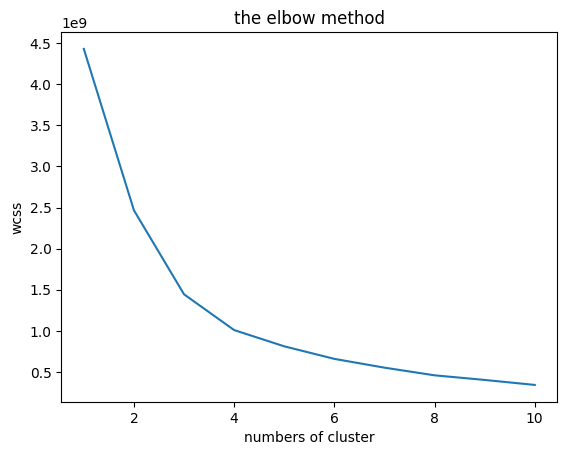

In [ ]:
wcss=[]
for i  in range(1,11):
  kc = KMeans(n_clusters=i,random_state=50)
  kc.fit(x)
  wcss.append(kc.inertia_)

plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('numbers of cluster')
plt.ylabel('wcss')
plt.show()

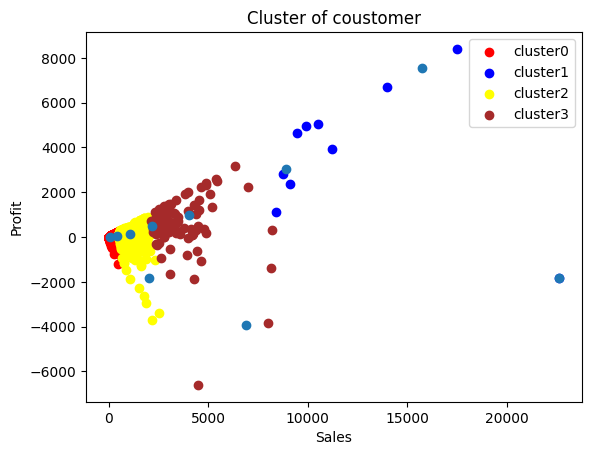

In [ ]:
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],c='red',label='cluster0')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],c='blue',label='cluster1')
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],c='yellow',label='cluster2')
plt.scatter(x[y_pred==3,0],x[y_pred==3,1],c='brown',label='cluster3')
#plt.scatter(x[y_pred==4,0],x[y_pred==4,1],c='violet',label='cluster4')
#plt.scatter(x[y_pred==5,0],x[y_pred==5,1],c='orange',label='cluster5')
plt.scatter(kc.cluster_centers_[:,0],kc.cluster_centers_[:,1])
plt.title('Cluster of coustomer')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend()
plt.show()

In [ ]:
df_order['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [ ]:
#Analyzing segment of each customer

In [ ]:
cst=df_order.groupby(['Customer ID','Segment']).count()

In [ ]:
cst

,,Order Date,Ship Date,Customer Name,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Customer ID,Segment,,,,,,,,,,,,,,,
AA-10315,Consumer,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
AA-10375,Consumer,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
AA-10480,Consumer,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
AA-10645,Consumer,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
AB-10015,Consumer,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XP-21865,Consumer,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
YC-21895,Corporate,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
YS-21880,Corporate,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12


In [ ]:
df_order['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [ ]:
#top product 10 product

In [ ]:
product_sales = df_order.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)


In [ ]:
top_products=product_sales.head(10)

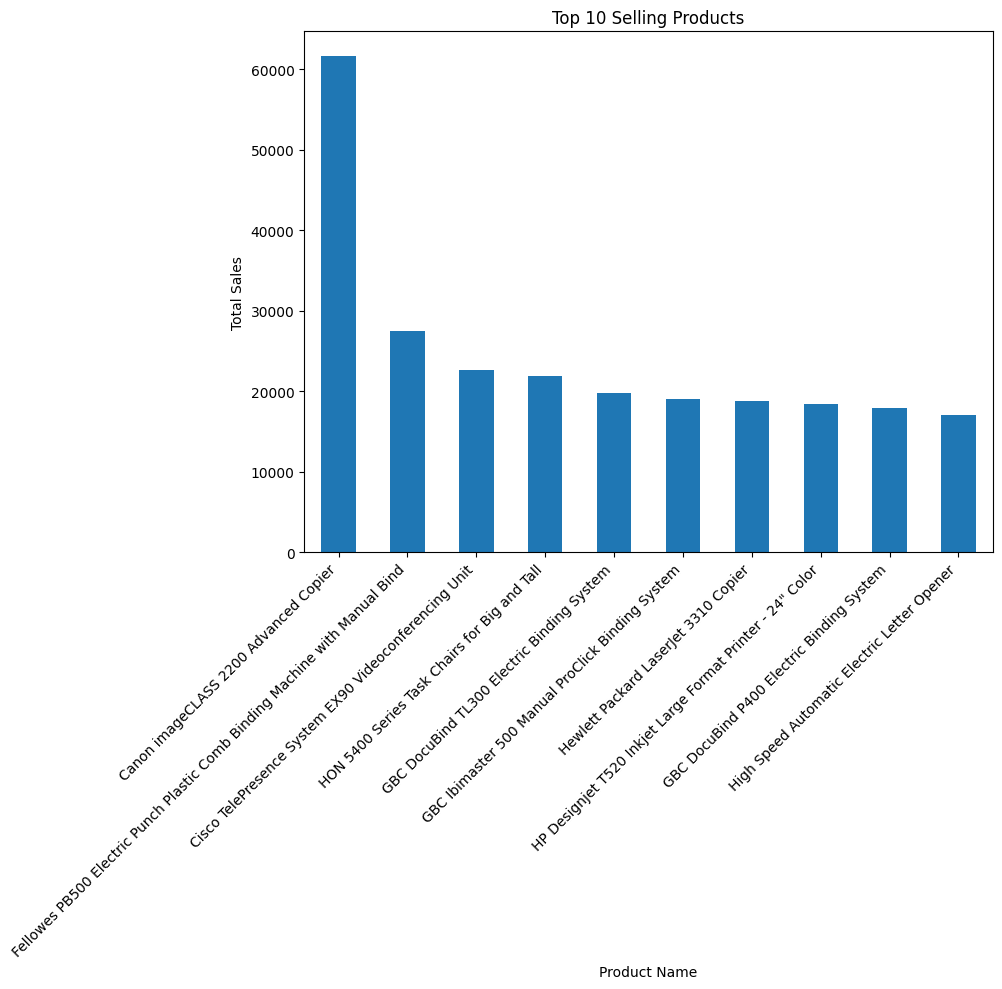

In [ ]:
plt.figure(figsize=(10, 10))
top_products.plot(kind='bar')
plt.title('Top 10 Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

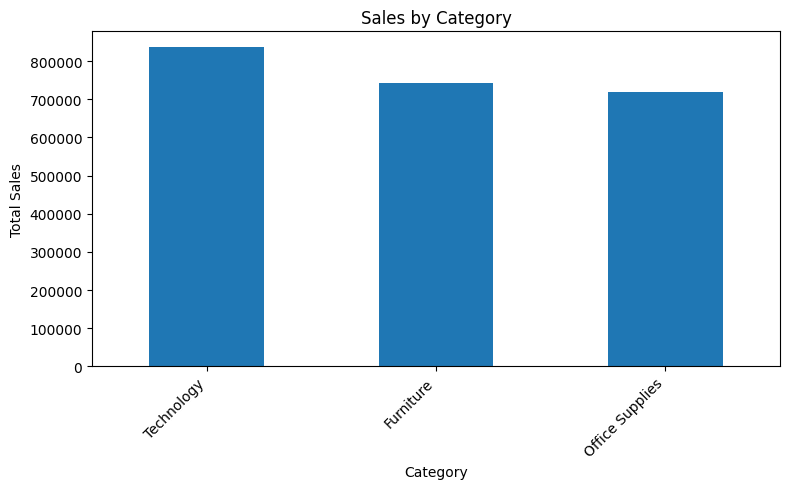

In [ ]:
category_sales = df_order.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Plot sales by category
plt.figure(figsize=(8, 5))
category_sales.plot(kind='bar')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df_order['YearMonth'] = df_order['Order Date'].dt.to_period('M')

In [ ]:
# Analyzing the performence over period time
product_sales_time = df_order.groupby(['Product Name', 'YearMonth'])['Sales'].sum()

In [ ]:
top_products_list = top_products.index.tolist()[:3]

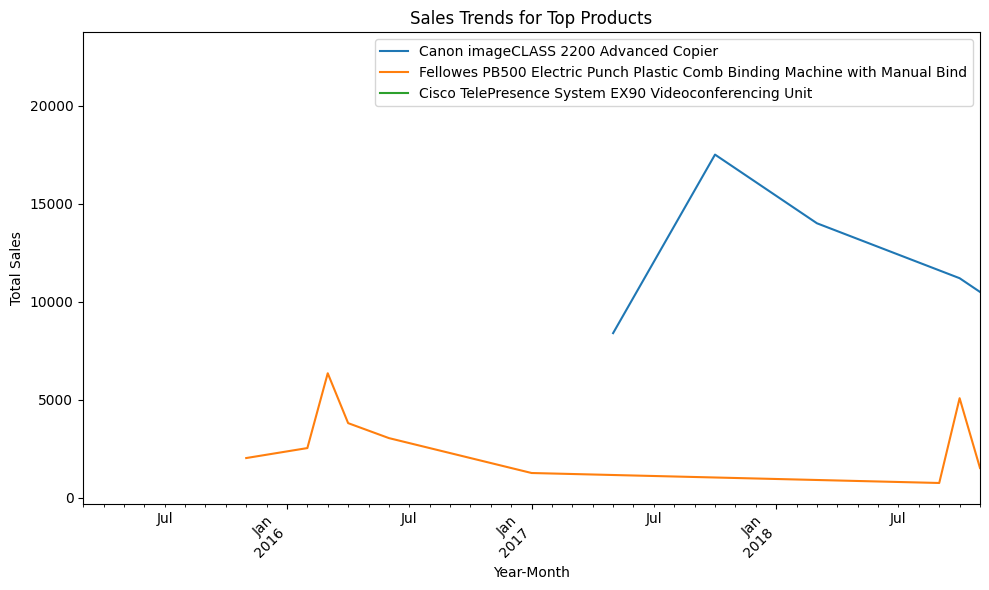

In [ ]:
# Plot sales trends for top products
plt.figure(figsize=(10, 6))
for product in top_products_list:
    product_sales_time[product].plot(label=product)
plt.title('Sales Trends for Top Products')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#daily sales trend
daily_sales = df_order.groupby(df_order['Order Date'].dt.date)['Sales'].sum()

# Monthly sales trend
monthly_sales = df_order.resample('M', on='Order Date')['Sales'].sum()

# Yearly sales trend
yearly_sales = df_order.resample('Y', on='Order Date')['Sales'].sum()

Order Date
2015-01-03      16.4480
2015-01-04     288.0600
2015-01-05      19.5360
2015-01-06    4407.1000
2015-01-07      87.1580
                ...    
2018-12-26     814.5940
2018-12-27     177.6360
2018-12-28    1657.3508
2018-12-29    2915.5340
2018-12-30     713.7900
Name: Sales, Length: 1236, dtype: float64

In [ ]:
 # Seaosnality and pattern on sales data

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(monthly_sales, model='multiplicative')


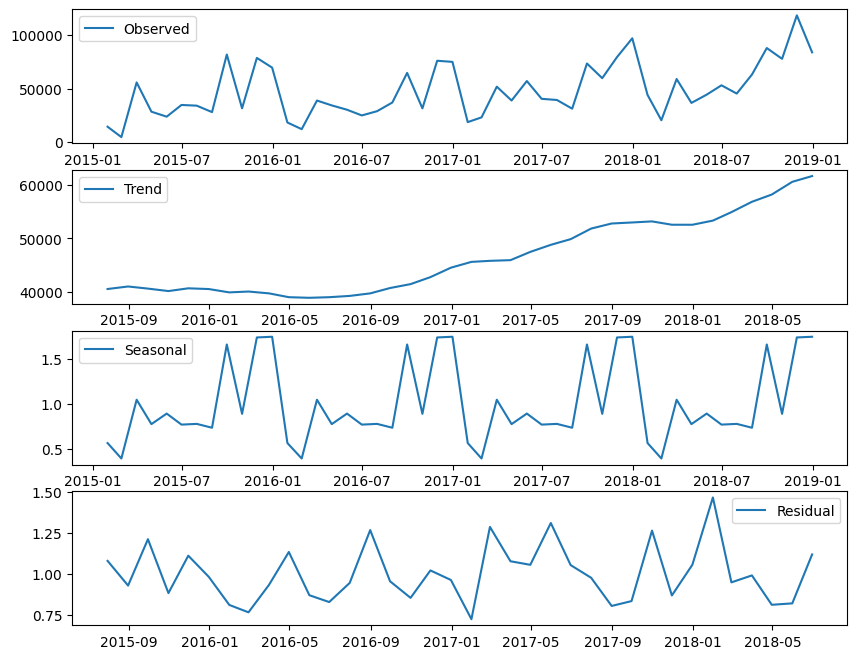

In [ ]:
# Plot the seasonal components
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(result.observed, label='Observed')
plt.legend()

plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend()

In [ ]:
df_order.head(5)

,Order Date,Ship Date,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,YearMonth
0,2017-11-08,2017-11-11,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2017-11
1,2017-11-08,2017-11-11,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2017-11
2,2017-06-12,2017-06-16,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2017-06
3,2016-10-11,2016-10-18,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2016-10
4,2016-10-11,2016-10-18,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2016-10


In [ ]:
df_order['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [ ]:
df_order['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [ ]:
df=df_order.groupby(['Category','Sub-Category']).count()

In [ ]:
df

Order Date  Ship Date  Customer ID  \
Category        Sub-Category                                       
Furniture       Bookcases            228        228          228   
                Chairs               617        617          617   
                Furnishings          957        957          957   
                Tables               319        319          319   
Office Supplies Appliances           466        466          466   
                Art                  796        796          796   
                Binders             1523       1523         1523   
                Envelopes            254        254          254   
                Fasteners            217        217          217   
                Labels               364        364          364   
                Paper               1370       1370         1370   
                Storage              846        846          846   
                Supplies             190        190          190   
Technology      Accessories          775        775          775   
                Copiers               68         68           68   
                Machines             115        115          115   
                Phones               889        889          889   

                              Customer Name  Segment  Country  City  State  \
Category        Sub-Category                                                 
Furniture       Bookcases               228      228      228   228    228   
                Chairs                  617      617      617   617    617   
                Furnishings             957      957      957   957    957   
                Tables                  319      319      319   319    319   
Office Supplies Appliances              466      466      466   466    466   
                Art                     796      796      796   796    796   
                Binders                1523     1523     1523  1523   1523   
                Envelopes               254      254      254   254    254   
                Fasteners               217      217      217   217    217   
                Labels                  364      364      364   364    364   
                Paper                  1370     1370     1370  1370   1370   
                Storage                 846      846      846   846    846   
                Supplies                190      190      190   190    190   
Technology      Accessories             775      775      775   775    775   
                Copiers                  68       68       68    68     68   
                Machines                115      115      115   115    115   
                Phones                  889      889      889   889    889   

                              Region  Product ID  Product Name  Sales  \
Category        Sub-Category                                            
Furniture       Bookcases        228         228           228    228   
                Chairs           617         617           617    617   
                Furnishings      957         957           957    957   
                Tables           319         319           319    319   
Office Supplies Appliances       466         466           466    466   
                Art              796         796           796    796   
                Binders         1523        1523          1523   1523   
                Envelopes        254         254           254    254   
                Fasteners        217         217           217    217   
                Labels           364         364           364    364   
                Paper           1370        1370          1370   1370   
                Storage          846         846           846    846   
                Supplies         190         190           190    190   
Technology      Accessories      775         775           775    775   
                Copiers           68          68            68     68   
             

In [ ]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Date     9994 non-null   datetime64[ns]
 1   Ship Date      9994 non-null   datetime64[ns]
 2   Customer ID    9994 non-null   object        
 3   Customer Name  9994 non-null   object        
 4   Segment        9994 non-null   object        
 5   Country        9994 non-null   object        
 6   City           9994 non-null   object        
 7   State          9994 non-null   object        
 8   Region         9994 non-null   object        
 9   Product ID     9994 non-null   object        
 10  Category       9994 non-null   object        
 11  Sub-Category   9994 non-null   object        
 12  Product Name   9994 non-null   object        
 13  Sales          9994 non-null   float64       
 14  Quantity       9994 non-null   int64         
 15  Discount       9994 n

In [ ]:
df_order.head()

,Order Date,Ship Date,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,YearMonth
0,2017-11-08,2017-11-11,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2017-11
1,2017-11-08,2017-11-11,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2017-11
2,2017-06-12,2017-06-16,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2017-06
3,2016-10-11,2016-10-18,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2016-10
4,2016-10-11,2016-10-18,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2016-10


In [ ]:
df_order['Order Date']=pd.to_datetime(df_order['Order Date'])
df_order.head(10)

,Order Date,Ship Date,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,YearMonth
0,2017-11-08,2017-11-11,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2017-11
1,2017-11-08,2017-11-11,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2017-11
2,2017-06-12,2017-06-16,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2017-06
3,2016-10-11,2016-10-18,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2016-10
4,2016-10-11,2016-10-18,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2016-10
5,2015-06-09,2015-06-14,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,2015-06
6,2015-06-09,2015-06-14,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656,2015-06
7,2015-06-09,2015-06-14,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152,2015-06
8,2015-06-09,2015-06-14,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825,2015-06
9,2015-06-09,2015-06-14,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700,2015-06


In [ ]:
df_order.head(5)

,Order Date,Ship Date,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,YearMonth
0,2017-11-08,2017-11-11,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2017-11
1,2017-11-08,2017-11-11,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2017-11
2,2017-06-12,2017-06-16,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2017-06
3,2016-10-11,2016-10-18,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2016-10
4,2016-10-11,2016-10-18,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2016-10


In [ ]:
df_people=pd.read_excel('/content/Sample - Superstore.xls',sheet_name='People')

In [ ]:
df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Person  4 non-null      object
 1   Region  4 non-null      object
dtypes: object(2)
memory usage: 192.0+ bytes


In [ ]:
df_people.head()

,Person,Region
0,Anna Andreadi,West
1,Chuck Magee,East
2,Kelly Williams,Central
3,Cassandra Brandow,South


In [ ]:
df_return=pd.read_excel('/content/Sample - Superstore.xls',sheet_name='Returns')

In [ ]:
df_return.head()

,Returned,Order ID
0,No,CA-2015-100762
1,No,CA-2015-100762
2,No,CA-2015-100762
3,No,CA-2015-100762
4,No,CA-2015-100867
